# Recurrent Neural Network for Audio Recognition <br>

Author: Jamie McQuire <br>

* This notebook is for the competition dataset.
* This is a recurrent neural network (RNN) model.
* The network will be trained using the image data from the data pre-processing notebook.
* Upload this notebook to [Google Colab](https://colab.research.google.com/) for faster computing with a GPU.
* If you wish to repeat this analysis please upload the data from the pre-processing notebook and upload to a google drive (directories must be set appropriately.



In [0]:
#import libraries 
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from keras.layers import Flatten, Conv2D, MaxPool2D, LSTM, Dropout, Dense, TimeDistributed, Input
from keras.models import Model, load_model
from keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight

* Mount to your google drive where you should have the data stored.
* Alternatively you can store the data in the Colab working environment.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


* Load in the training and validation data from the pre-processing notebook.
* Set your directories for reproducible analysis.

In [0]:
#load in the training data and labels
X_train = np.load("/content/drive/My Drive/competition_data/X_train.npy")
Y_train = np.load("/content/drive/My Drive/competition_data/Y_train.npy")

#load in the validation data and labels
X_val = np.load("/content/drive/My Drive/competition_data/X_val.npy")
Y_val = np.load("/content/drive/My Drive/competition_data/Y_val.npy")

* These are the default settings
* Check that image_size = (161,99,1)

In [0]:
batch_size = 128
epochs = 10
image_size = X_train.shape[1:]
output_size = 6

print(image_size)

(161, 99, 1)


* Scale the image pixels for deep learning.

In [0]:
X_train_scaled = X_train * (1 / 255)
X_val_scaled = X_val * (1  / 255)

* Remove the channel dimension for the LSTM layers.

In [0]:
#remove the channel dimension for the recurrent neural networks 
X_train_scaled = np.squeeze(X_train_scaled,axis=3)
X_val_scaled = np.squeeze(X_val_scaled,axis=3)

* Convert the labels to one-hot-encoded vectors.

In [0]:
Y_train = to_categorical(Y_train,num_classes=12)
Y_val = to_categorical(Y_val,num_classes=12)


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

* This function will define the RNN model architecture.

In [0]:
def create_recurrent_model(input_shape=(161,99),num_classes=12):

  X_input = Input(input_shape)

  #first LSTM layer
  X = LSTM(512,input_shape=input_shape, return_sequences=True)(X_input)
  X = LSTM(256, return_sequences=True)(X)
  X = LSTM(512,return_sequences=True)(X)
  X = Dropout(0.5)(X)

  #reduce the dimensions
  X = TimeDistributed(Dense(256,activation="relu"))(X)
  X = TimeDistributed(Dense(128,activation="relu"))(X)
  X = TimeDistributed(Dense(64,activation="relu"))(X)
  X = TimeDistributed(Dense(32,activation="relu"))(X)
  X = Dropout(0.5)(X)
  X = Flatten()(X)
  X  = Dense(num_classes,activation="softmax")(X)

  model = Model(inputs=X_input,outputs=X,name="RNN_Classifier")

  return model

* Generate and compile the model.
* The summary should provide information about the layers.

In [0]:
model = create_recurrent_model()
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["acc"])
model.summary()

Model: "RNN_Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 161, 99)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 161, 512)          1253376   
_________________________________________________________________
lstm_5 (LSTM)                (None, 161, 256)          787456    
_________________________________________________________________
lstm_6 (LSTM)                (None, 161, 512)          1574912   
_________________________________________________________________
dropout_3 (Dropout)          (None, 161, 512)          0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 161, 256)          131328    
_________________________________________________________________
time_distributed_6 (TimeDist (None, 161, 128)       

* Generate the class weights.
* This is because the unknown class contains significantly more files than the other labels.

In [0]:
Y_integers = np.argmax(Y_train, axis=1)
class_weights = compute_class_weight('balanced', np.unique(Y_integers), Y_integers)
d_class_weights = dict(enumerate(class_weights))

* Train the model over the default settings.

In [0]:
history = model.fit(X_train_scaled,Y_train,batch_size=batch_size,epochs=20,verbose=1,validation_data=(X_val_scaled,Y_val))

Train on 59531 samples, validate on 7200 samples
Epoch 1/20
59531/59531 [==============================] - 409s 7ms/step - loss: 1.2850 - acc: 0.6449 - val_loss: 0.9746 - val_acc: 0.6946
Epoch 2/20
59531/59531 [==============================] - 406s 7ms/step - loss: 0.8931 - acc: 0.7117 - val_loss: 0.7187 - val_acc: 0.7510
Epoch 3/20
59531/59531 [==============================] - 404s 7ms/step - loss: 0.6611 - acc: 0.7829 - val_loss: 0.6235 - val_acc: 0.7946
Epoch 4/20
59531/59531 [==============================] - 405s 7ms/step - loss: 0.5377 - acc: 0.8254 - val_loss: 0.4488 - val_acc: 0.8514
Epoch 5/20
59531/59531 [==============================] - 405s 7ms/step - loss: 0.4548 - acc: 0.8522 - val_loss: 0.4558 - val_acc: 0.8528
Epoch 6/20
59531/59531 [==============================] - 404s 7ms/step - loss: 0.3927 - acc: 0.8726 - val_loss: 0.3783 - val_acc: 0.8781
Epoch 7/20
59531/59531 [==============================] - 404s 7ms/step - loss: 0.3495 - acc: 0.8872 - val_loss: 0.3858 - v

* Save the model to your working environment to use later.
* This is to prevent errors causing you to have to retrain the entire model again!

In [0]:
model.save("RNN_Model.h5")

* Code to plot the accuracy of the training and validation sets during model training.
* Will save to a PDF figure in the working environment.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


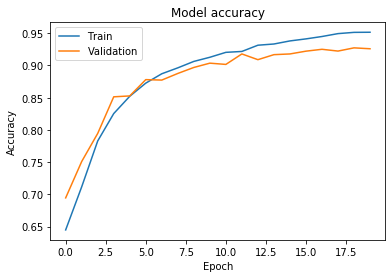

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='bottom right')
fig = plt.gcf()
fig.savefig("RNN_fvocab_acc.pdf",bbox_inches = "tight")
plt.show()

* Code to plot the loss of the training and validation sets during model training.
* Will save to a PDF figure in the working environment.

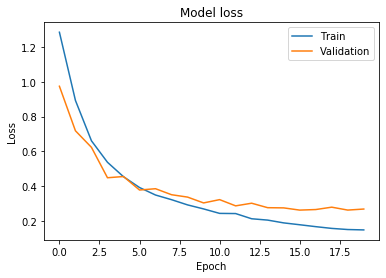

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
fig = plt.gcf()
fig.savefig("RNN_fvocab_loss.pdf",bbox_inches = "tight")
plt.show()

* Load the model in for analysis.
* Note: Skip if you do not need to do this step.

In [0]:
model = load_model("/content/drive/My Drive/Tensor_Flow_Speech_Recognition_Challenge/Trained_Models/Recurrent_Net_Model.h5")

* Load in the testing data, scale, and then remove the channel dimension.
* Make predictions using the testing data.

In [0]:
X1 = np.load("/content/drive/My Drive/Tensor_Flow_Speech_Recognition_Challenge/Data_Files/test/X_train_p1.npy")
X1 = X1 * (1/255)
X1 = np.squeeze(X1,axis=3)
predict_1 = model.predict(X1)

FileNotFoundError: ignored

* Repeat for the other parts of the testing data.

In [0]:
X1 = 0
X2 = np.load("/content/drive/My Drive/Tensor_Flow_Speech_Recognition_Challenge/Data_Files/test/X_train_p2.npy")
X2 = X2 * (1/255)
X2 = np.squeeze(X2,axis=3)
predict_2 = model.predict(X2)

In [0]:
X2 = 0
X3 = np.load("/content/drive/My Drive/Tensor_Flow_Speech_Recognition_Challenge/Data_Files/test/X_train_p3.npy")
X3 = X3 * (1/255)
X3 = np.squeeze(X3,axis=3)
predict_3 = model.predict(X3)

* Load in the filename .csv file from the testing pre-processing notebook.

In [0]:
output_data = pd.read_csv("/content/drive/My Drive/Tensor_Flow_Speech_Recognition_Challenge/Data_Files/test/filenames.csv")

* Convert the model outputs into integers representing the predicted word.

In [0]:
predicted_class1 = np.argmax(predict_1,axis=1)
predicted_class2 = np.argmax(predict_2,axis=1)
predicted_class3 = np.argmax(predict_3,axis=1)

* Create a dictionary that maps the number to the correct word.
* Map the predicted integers to the correct word for each prediction.
* Append the lists together to get a list of the predicted words for the testing set.

In [0]:
label_dict = {
    0 : "yes",
    1 : "no",
    2 : "up",
    3 : "down",
    4 : "left",
    5 : "right",
    6 : "on",
    7 : "off",
    8 : "stop",
    9 : "go",
    10 : "silence",
    11 : "unknown"

}

predicted_class_labels1 = [label_dict[k] for k in predicted_class1]
predicted_class_labels2 = [label_dict[k] for k in predicted_class2]
predicted_class_labels3 = [label_dict[k] for k in predicted_class3]

predicted_class_label = predicted_class_labels1 + predicted_class_labels2 + predicted_class_labels3

* Create a new column in the dataframe caled "label" which we will fill with the predicted words for each file.
* Drop the unnamed axis from the output data.
* Check that the output looks correct.

In [0]:
output_data["label"] = np.nan

predicted_class_array = np.asarray(predicted_class_label)
print(predicted_class_array)

output_data["label"] = predicted_class_array

output_data = output_data.drop("Unnamed: 0",axis=1)

output_data.head()

* Convert the dataframe to a .csv file.
* Ensure index=False.
* The file is ready for submission to Kaggle.

In [0]:
output_data.to_csv("submission2.csv",index=False)